<a href="https://colab.research.google.com/github/SokKanaTorajd/roadque-bangkit21/blob/main/RoadQue_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tensorflow

from google.colab.patches import cv2_imshow
import cv2

In [2]:
# Download datasets

# this dataset is corrupted. (Japan's train annotations is missing)
# !wget "https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/5ty2wb6gvg-1.zip"

# We use this one from different source.
# train dataset
!wget "https://mycityreport.s3-ap-northeast-1.amazonaws.com/02_RoadDamageDataset/public_data/IEEE_bigdata_RDD2020/train.tar.gz"

# test-1 and test-2 datasets
!wget "https://data.mendeley.com/public-files/datasets/5ty2wb6gvg/files/c7c98ce8-f5df-4fd6-8249-8c327a7228ce/file_downloaded"
!wget "https://data.mendeley.com/public-files/datasets/5ty2wb6gvg/files/cd7f2818-803d-471b-8a44-4c9aec6bd6ef/file_downloaded"

# file structure
!wget "https://data.mendeley.com/public-files/datasets/5ty2wb6gvg/files/7c8780cf-ee51-4880-96bc-3fbde24d1483/file_downloaded"

--2021-05-20 01:55:33--  https://mycityreport.s3-ap-northeast-1.amazonaws.com/02_RoadDamageDataset/public_data/IEEE_bigdata_RDD2020/train.tar.gz
Resolving mycityreport.s3-ap-northeast-1.amazonaws.com (mycityreport.s3-ap-northeast-1.amazonaws.com)... 52.219.4.151
Connecting to mycityreport.s3-ap-northeast-1.amazonaws.com (mycityreport.s3-ap-northeast-1.amazonaws.com)|52.219.4.151|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1472626254 (1.4G) [application/x-tar]
Saving to: ‘train.tar.gz’

train.tar.gz        100%[===================>]   1.37G  12.8MB/s    in 1m 56s  

2021-05-20 01:57:30 (12.1 MB/s) - ‘train.tar.gz’ saved [1472626254/1472626254]

--2021-05-20 01:57:30--  https://data.mendeley.com/public-files/datasets/5ty2wb6gvg/files/c7c98ce8-f5df-4fd6-8249-8c327a7228ce/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP re

In [3]:
# # Unzip Datasets
# !unzip 5ty2wb6gvg-1.zip

# Untar train dataset
!tar -xvf train.tar.gz

Streaming output truncated to the last 5000 lines.
train/Japan/annotations/xmls/Japan_009766.xml
train/Japan/annotations/xmls/Japan_006254.xml
train/Japan/annotations/xmls/Japan_008726.xml
train/Japan/annotations/xmls/Japan_004664.xml
train/Japan/annotations/xmls/Japan_007945.xml
train/Japan/annotations/xmls/Japan_006391.xml
train/Japan/annotations/xmls/Japan_005903.xml
train/Japan/annotations/xmls/Japan_008200.xml
train/Japan/annotations/xmls/Japan_003663.xml
train/Japan/annotations/xmls/Japan_001949.xml
train/Japan/annotations/xmls/Japan_011141.xml
train/Japan/annotations/xmls/Japan_003141.xml
train/Japan/annotations/xmls/Japan_002870.xml
train/Japan/annotations/xmls/Japan_008094.xml
train/Japan/annotations/xmls/Japan_007381.xml
train/Japan/annotations/xmls/Japan_012963.xml
train/Japan/annotations/xmls/Japan_007843.xml
train/Japan/annotations/xmls/Japan_004889.xml
train/Japan/annotations/xmls/Japan_011099.xml
train/Japan/annotations/xmls/Japan_003745.xml
train/Japan/annotations/xmls/

In [4]:
# count images in each train folder
train_dirs = ['./train/Czech/images','./train/India/images', './train/Japan/images']

for dir in train_dirs:
  print('{} contains {} images.'.format(dir,len(os.listdir(dir))))

./train/Czech/images contains 2829 images.
./train/India/images contains 7706 images.
./train/Japan/images contains 10506 images.


In [5]:
image_files = []

for dir in (train_dirs):
  for images in os.listdir(dir):
    image_files.append(images)

In [6]:
print(len(image_files))
print(image_files[0:5])

21041
['Czech_000407.jpg', 'Czech_000601.jpg', 'Czech_002027.jpg', 'Czech_002380.jpg', 'Czech_001554.jpg']


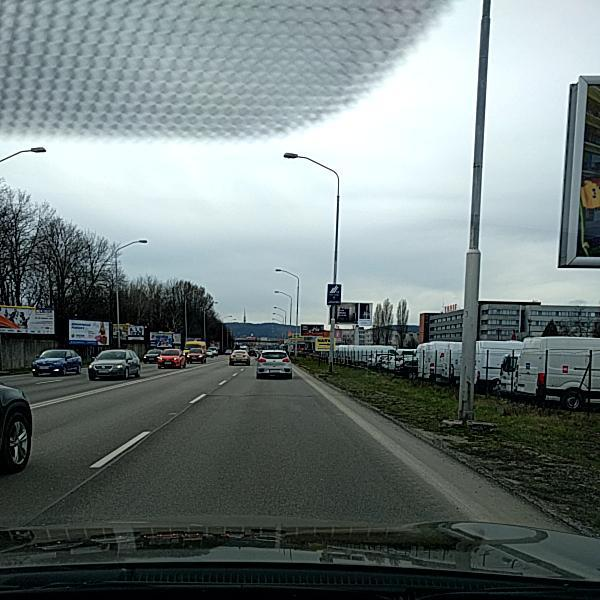

(600, 600, 3)


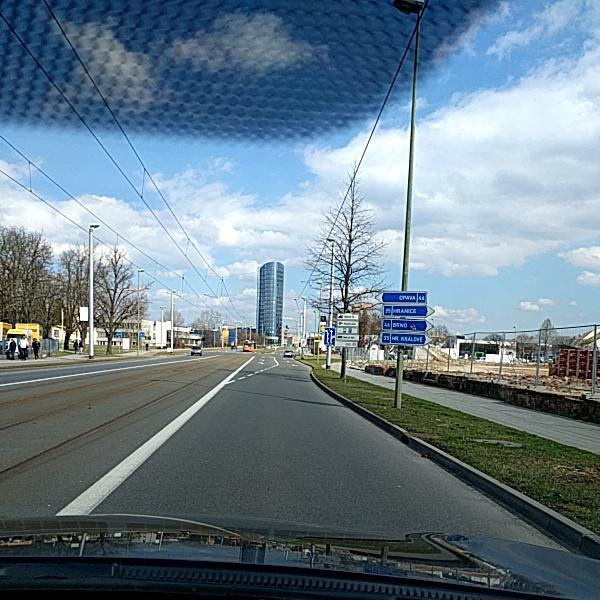

(600, 600, 3)


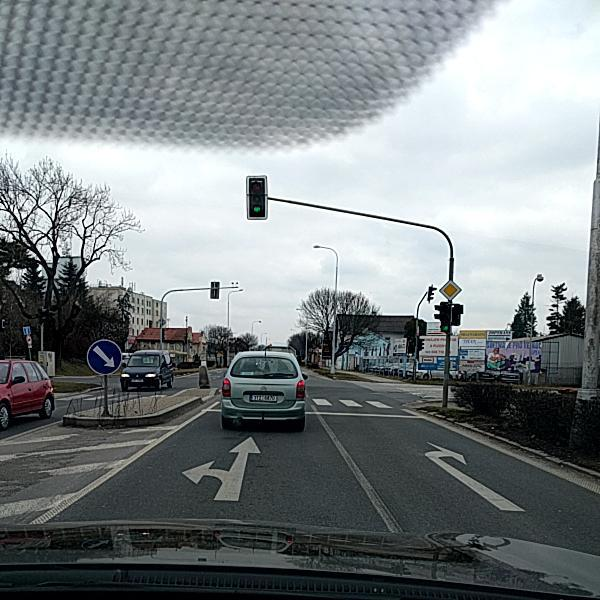

(600, 600, 3)


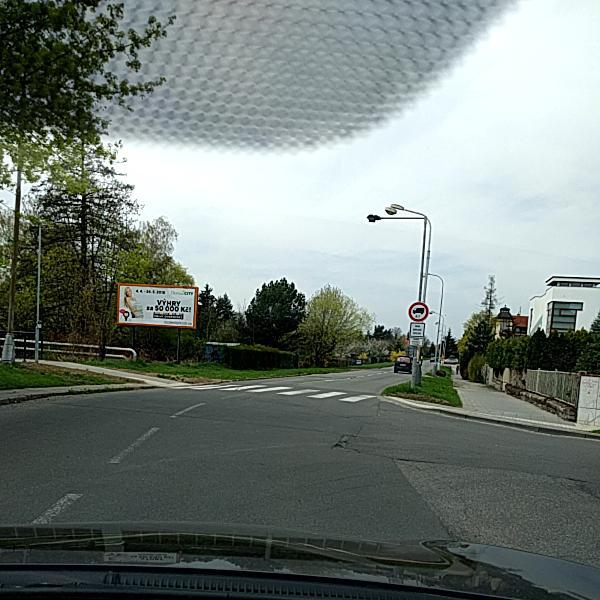

(600, 600, 3)


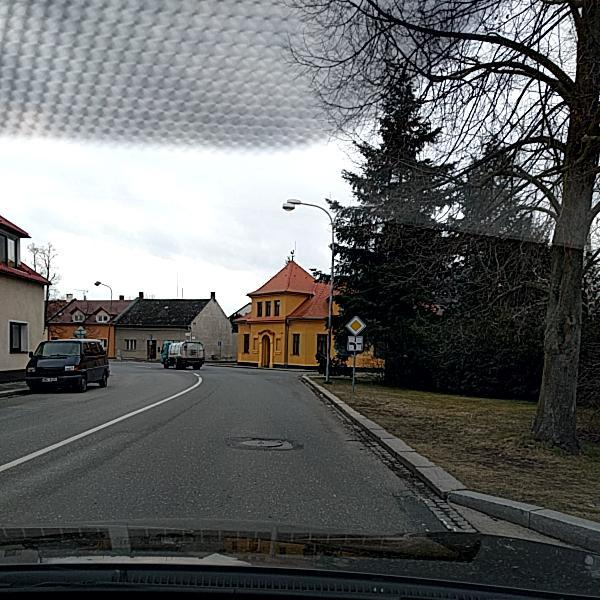

(600, 600, 3)


In [7]:
for i in range(5):
  img_name = train_dirs[0]+'/'+image_files[i]
  img = cv2.imread(img_name)
  cv2_imshow(img)
  print(img.shape)